
# Programmieraufgaben

## Teilaufgabe a)

Implementieren Sie die linke Rechtecksregel, die Mittelpunktsregel und die Simpson-Regel in Python.
Übergeben Sie dazu eine Funktion, sowie Start- und Endpunkt des Integrationsintervalls und die
Anzahl der Teilintervalle. Rückgabewert ist die Näherung ans Integral.

Hierzu betrachten wir die Quadraturformel

$\int_{0}^{1}g(\tau)d \tau \approx \sum_{i=1}^s b_ig(c_i)$

Allgemein gilt für die Rechtecksregeln $s=1$

+ Linke Rechtecksregel $b_1 =1$, c_1 = 0$
+ Mittelpunktsregel $b_1 = 1, c_1  = \frac{1}{2}

Für die Trapezregel ist $s = 2$

+ $b_1 = b_2 = \frac{1}{2}, c_1 = 0, c_2 = 1$

Und für die Simpson Regel $s = 3$

+ $b_1 = \frac{1}{6}, b_2 = \frac{2}{3}, c_1 = 0 , c_2 = \frac{1}{2}, c_3=1$

Grundsätzlich muss man sich noch über die Rücktransformation gedanken machen

hier ist $h_j = x_{j+1} - x_j$

$\int_{a}{b} f(x)dx = \sum_{j=0}^{N-1}\int_{x_j}^{x_{j+1}} f(x)dx \approx \sum_{j=0}^{N-1}h_j \sum_{i=1}^{s}b_if(x_j + c_ih_j)$

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# define the function

def f(x):
    return np.cos(x)*np.exp(np.sin(x))


def linke_rechtecksregel(f,a,b,N):
    # Zuerst berechnen wir h und splitten das Integrationsintervall in N Teile
    # Dazu verwenden wir numpy.linspace was ein Intervall in N teile aufteilt
    x_vals = np.linspace(a,b,N)
    
    # nun ist für die linke Rechtecksregel
    b1 = 1
    c1 = 0
    
    # Wir verwenden numpy.diff um uns die n-th diskreten Differenzen von h zu berechnen
    # out[i] = a[i+1] - a[i] das Funktioniert rekursiv
    h_vals = np.diff(x_vals)

    interval_results = []
    for j in range(0,N-1):
        result = h_vals[j] * b1*f(x_vals[j])
        interval_results.append(result)
    
    # Final result is the sum over all the intervalls
    return np.sum(interval_results)
    
def mittelpunktsregel(f,a,b,N):
    x_vals = np.linspace(a,b,N)
    b1 = 1
    c1 = 0.5
    h_vals = np.diff(x_vals)
    interval_result = []
    for j in range(0,N-1):
        result = h_vals[j]*b1*f(x_vals[j]+c1*h_vals[j])
        interval_result.append(result)
    return np.sum(interval_result)

def simpsonregel(f,a,b,N):
    x_vals = np.linspace(a,b,N)
    bi = [1/6, 2/3, 1/6]
    ci = [0, 1/2, 1]
    h_vals = np.diff(x_vals)
    interval_result = []
    for j in range(0,N-1):
        first_sum = []
        for i in range(0,3):
            result= bi[i] * f(x_vals[j]+ci[i]*h_vals[j])
            first_sum.append(result)
        interval_result.append((h_vals[j]*np.sum(first_sum)))
        
        #interval_result.append(result)
    return np.sum(interval_result)

print("Ergebnis der linken Rechtecksregel: ",linke_rechtecksregel(f,0,3,10000))
print("Ergebnis der Mittelpunktsregel: ", mittelpunktsregel(f,0,3,10000))
print("Ergebnis der Simpson-Regel: ",simpsonregel(f,0,3,10000))


Ergebnis der linken Rechtecksregel:  0.15188387414930815
Ergebnis der Mittelpunktsregel:  0.1515628366416064
Ergebnis der Simpson-Regel:  0.15156283651453484


## Teilaufgabe 2)

Variieren Sie N und erstellen Sie ein Genauigkeit-Aufwandsdiagramm (vgl. Abb. 1.3 im Skript) für
Aufgabe (1)

Wir berechnen also zuerst den Analytischen Wert unseres integrals dies ist durch folgende Stammfunktion gegeben:

$\int cos(x)e^{sin(x)}dx = e^{sin(x)} + C$

damit $e^{sin(3)} - 1$

Dann plotten wir jeweils den Absolutbetrag des Fehlers und $fe = s*N$ den rechenaufwand

0.15156283651453495


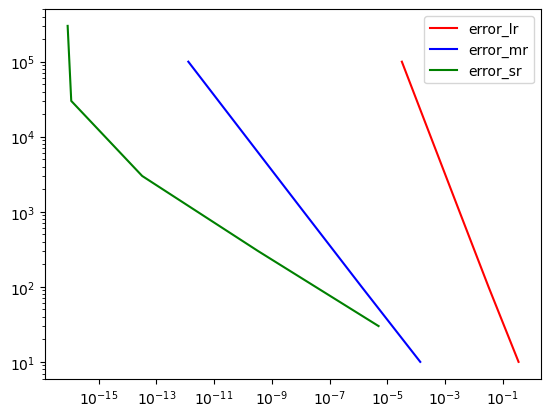

In [3]:
analytical_value = np.exp(np.sin(3)) - 1

print(analytical_value)

# Nehme nun N values
n_vals = np.array([10, 100, 1000, 10000, 100000])

# Leere Listen um die Error werte zu appenden

# Nun erstellen wir uns 1D arrays um unsere Werte zu speichern

error_lr = np.zeros(len(n_vals))
error_mr = np.zeros(len(n_vals))
error_sr = np.zeros(len(n_vals))
for i in range(0,len(n_vals)):
    error_lr[i] = abs(linke_rechtecksregel(f,0,3,n_vals[i]) - analytical_value)
    error_mr[i] = abs(mittelpunktsregel(f,0,3,n_vals[i]) - analytical_value)
    error_sr[i] = abs(simpsonregel(f,0,3,n_vals[i])-analytical_value)
    
# nun polotten wir die in den gleichen graphen
plt.plot(error_lr,n_vals, color ="red",label ="error_lr")
plt.plot(error_mr,n_vals, color ="blue",label ="error_mr")
plt.plot(error_sr, 3*n_vals, color="green", label="error_sr")

# Zudem hat man in matplotlib mit xscale und yscale gleich die Option automatisch die Achsen zu skalierne

plt.xscale("log")
plt.yscale("log")

plt.legend()
plt.show()
